In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Markdown
# mpl.rc('text', usetex=True)
mpl.rc('font', family='sans-serif')
mpl.rc('font',size = 8)
mpl.rc('mathtext',fontset = 'stix')

mpl.rc('xtick', labelsize=4)
mpl.rc('ytick', labelsize=4)
mpl.rc('axes', labelsize=8)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.5)
mpl.rc('figure', figsize=(3.55/2.54, 2.8/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)


cm_number = 14
cm = plt.cm.get_cmap("Purples")
# colors = ["#F9D5DD","#E3738B","#713948","#DCE4FA","#8CA5EA","#495373"]
colors = ["#b3c8cd", "#87b26c","#811c35","#DE8F5F","#585d5e"]
Colors = [cm(1. / (cm_number - 1) * i) for i in range(0, cm_number)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


C:\Users\tengm\AppData\Local\Temp\ipykernel_10028\3256712815.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("Purples")


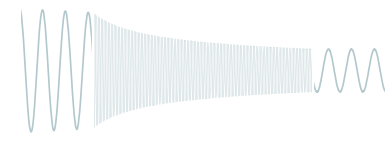

In [2]:
Fs = 20
T = 2000
t = np.linspace(0,T,T*Fs)
omega0 = np.sqrt(1)

# weakly dynamic, \epsilon = 1e-3
def WND(x,t):
    dxdt = [x[1], -omega0**2*x[0]-1e-2*(x[1]**3+2*x[0]**3)]
    return dxdt
x0 = [1,0]
WND_response = odeint(WND, y0 = x0,t = t)
noise = 0.01
N = len(WND_response[:,0])
Observation = WND_response[:,0] + np.random.random(N) * noise

fig,ax = plt.subplots(figsize = (4/2.54,1.5/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.4,color = colors[0],label = "$x'' = -x$")
axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.4,color = colors[0],label = "$x'' = -x$")
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.05,color = colors[0],label = "$x'' = -x$")
axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
# axins.set_xlabel("Time")
plt.savefig("./Fig/Datainput.svg",dpi = 300,transparent = True,bbox_inches="tight",pad_inches = 0.00)

-0.0018457791307691096


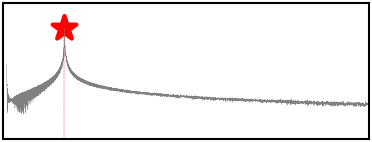

In [3]:
def Omega_0(x,Fs):
    from scipy.fftpack import fft
    L = len(x)
    N = np.power(2, np.ceil(np.log2(L)))
    fft_x = np.abs(fft(x,n = int(N)))[range(int(N/2))]
    Freq = np.arange(int(N/2))*Fs/N
    Main_freq = Freq[np.argmax(fft_x)]
    omega0 = (Main_freq*2*np.pi)
    fig,ax = plt.subplots(figsize =(4/2.54,1.5/2.54),dpi = 300)
    ax.plot(Freq, fft_x, lw = 0.1,color = "gray")
    ax.scatter(Main_freq,np.max(fft_x),marker = "*",color = 'red')
    ax.plot([Main_freq,Main_freq],[0,np.max(fft_x)], lw = 0.1, color = 'red',ls= '--')
    ax.set_yscale("log")
    ax.set_xlim(-0.01,1)
    ax.set_ylim(1e-1,1e5)
    ax.set_xticks([])
    # ax.set_xticklabels([r"$\frac{\omega_0}{2\pi}$"],fontsize = 12,color = 'red')
    ax.set_yticks([])
    # ax.set_xlabel("Frequency")
    plt.savefig("./Fig/fft.svg",dpi = 300,transparent = True,bbox_inches="tight",pad_inches = 0.01)
    
    return omega0

omega_0 = Omega_0(Observation,Fs)
# omega_0 = 2.01
print(omega0**2-omega_0**2)

def Standard(x,t):
    dxdt = [x[1], -omega_0**2*x[0]]
    return dxdt
Origin = odeint(Standard, y0 = x0,t = t)

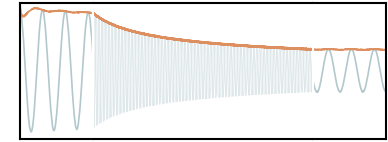

In [4]:
from scipy.signal import hilbert, find_peaks

analytic_x = hilbert(Observation)
amplitude_envelope = np.abs(analytic_x)
instantaneous_phase = np.angle(analytic_x)

fig,ax = plt.subplots(figsize = (4/2.54,1.5/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.4,color = colors[0],label = "$x'' = -x$")
axins.plot(t, amplitude_envelope,lw = 0.4,color = colors[3],label = "$x'' = -x$")

axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
# axins.spines["top"].set_color("white")
# axins.spines["bottom"].set_color("white")
# axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.4,color = colors[0],label = "$x'' = -x$")
axins.plot(t, amplitude_envelope,lw = 0.4,color = colors[3],label = "$x'' = -x$")
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
# axins.spines["right"].set_color("white")
# axins.spines["top"].set_color("white")
# axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.05,color = colors[0],label = "$x'' = -x$")
axins.plot(t, amplitude_envelope,lw = 0.4,color = colors[3],label = "$x'' = -x$")
axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
# axins.spines["top"].set_color("white")
# axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
plt.savefig("./Fig/hlibert_amplitude.svg",dpi = 300,transparent = True,bbox_inches="tight",pad_inches = 0.01)

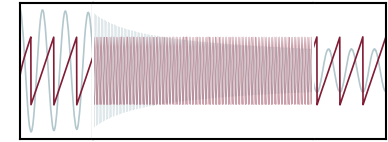

In [5]:
from scipy.signal import hilbert, find_peaks

analytic_x = hilbert(Observation)
amplitude_envelope = np.abs(analytic_x)
instantaneous_phase = np.angle(analytic_x)

fig,ax = plt.subplots(figsize = (4/2.54,1.5/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.4,color = colors[0],label = "$x'' = -x$")
ax2 = axins.twinx()
ax2.plot(t, instantaneous_phase,lw = 0.4,color = colors[2],label = "$x'' = -x$")
ax2.set_xlim(0,20)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(-np.pi*2,np.pi*2)

axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
# axins.spines["top"].set_color("white")
# axins.spines["bottom"].set_color("white")
# axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.4,color = colors[0],label = "$x'' = -x$")
ax2 = axins.twinx()
ax2.plot(t, instantaneous_phase,lw = 0.4,color = colors[2],label = "$x'' = -x$")
ax2.set_xlim(980,1000)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(-np.pi*2,np.pi*2)
ax2.spines["left"].set_color("white")
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
# axins.spines["right"].set_color("white")
# axins.spines["top"].set_color("white")
# axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, Observation,lw = 0.05,color = colors[0],label = "$x'' = -x$")
ax2 = axins.twinx()
ax2.plot(t, instantaneous_phase,lw = 0.05,color = colors[2],label = "$x'' = -x$")
ax2.set_xlim(20,980)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylim(-np.pi*2,np.pi*2)
ax2.spines["right"].set_color("white")
axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
# axins.spines["top"].set_color("white")
# axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
plt.savefig("./Fig/hlibert_phase.svg",dpi = 300,transparent = True,bbox_inches="tight",pad_inches = 0.01)

Identifed result: 1.0009
Ground Truth: 1.0000


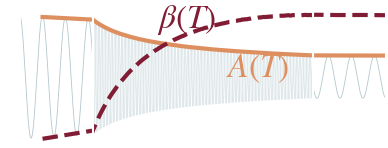

In [6]:
import sys
sys.path.append("../Model")
import Model
library = [
    lambda x:x[0],
    lambda x:x[0]*x[0],
    lambda x:x[0]*x[0]*x[0],
    lambda x:x[1],
    lambda x:x[1]*x[1],
    lambda x:x[1]*x[1]*x[1],
    lambda x:x[0]*x[1],
    lambda x:x[0]*x[0]*x[1],
    lambda x:x[0]*x[1]*x[1],
]

library_name = [
    lambda x:x[0],
    lambda x:x[0]+'^2',
    lambda x:x[0]+'^3',
    lambda x:x[1],
    lambda x:x[1]+'^2',
    lambda x:x[1]+'^3',
    lambda x:x[0]+x[1],
    lambda x:x[0]+'^2'+x[1],
    lambda x:x[0]+x[1]+'^2',
]
feature_name = ["x", "\dot{x}"]
dim = 1
model = Model.WeakNO(dim,library,library_name)
model.Get_frequency(Observation.reshape(-1,1),t)
print("Identifed result: %.4f"%model.frequencys[0])
print("Ground Truth: %.4f" %omega0)

model.Get_Evolution(smooth_window = 1)

fig,ax = plt.subplots(figsize = (4/2.54,1.5/2.54),dpi = 300)
# ax.spines["left"].set_color("white")
# ax.spines["right"].set_color("white")
# ax.spines["top"].set_color("white")
# ax.spines["bottom"].set_color("white")
ax.set_xticks([])
ax.set_yticks([])

ax.set_axis_off()
axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 0.2,color =colors[0],label = "\epsilon = 1e-3")
axins.plot(model.t_evolutions[:-1],model.evolutions[0,0,:-1], color = colors[3],lw = 1)
ax2 = axins.twinx()
ax2.plot(model.t_evolutions[:-1],np.radians(model.evolutions[1,0,:-1]), lw = 1,color = colors[2],ls = "--")
ax2.set_xlim(0,T)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines["right"].set_color("white")
ax2.spines["top"].set_color("white")
ax2.spines["bottom"].set_color("white")
ax2.spines["left"].set_color("white")
# plt.legend(fontsize = 5,ncol = 2,bbox_to_anchor = (5,1.3),loc = 'upper center')
axins.set_xlim(0,20)
# axins.set_ylabel(r"$x$")
axins.set_xticks([])
axins.set_yticks([])
axins.set_ylim(-1.1,1.1)
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")

axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                   bbox_to_anchor=(0.8, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 0.2,color =colors[0],label = "\epsilon = 1e-3")
axins.plot(model.t_evolutions[:-1],model.evolutions[0,0,:-1], color = colors[3],lw = 1)
ax2 = axins.twinx()
ax2.plot(model.t_evolutions[:-1],np.radians(model.evolutions[1,0,:-1]), lw = 1,color = colors[2],ls = "--")
ax2.set_xlim(0,T)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines["right"].set_color("white")
ax2.spines["top"].set_color("white")
ax2.spines["bottom"].set_color("white")
ax2.spines["left"].set_color("white")
axins.set_xlim(980,1000)
axins.set_ylim(-1.1,1.1)
axins.set_xticks([])
axins.set_yticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                   bbox_to_anchor=(0.2, 0, 1, 1),
                   bbox_transform=ax.transAxes)
axins.plot(t, WND_response[:,0],lw = 0.05,color =colors[0],label = "\epsilon = 1e-3")
axins.plot(model.t_evolutions[:-1],model.evolutions[0,0,:-1], color = colors[3],lw = 1)
ax2 = axins.twinx()
ax2.plot(model.t_evolutions[:-1],np.radians(model.evolutions[1,0,:-1]), lw = 1,color = colors[2],ls = "--")
ax2.set_xlim(0,T)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines["right"].set_color("white")
ax2.spines["top"].set_color("white")
ax2.spines["bottom"].set_color("white")
ax2.spines["left"].set_color("white")


axins.set_xlim(20,980)
axins.set_ylim(-1.1,1.1)
axins.set_yticks([])
# axins.set_xticks([500,1000,1500])
axins.set_xticks([])
axins.spines["right"].set_color("white")
axins.spines["top"].set_color("white")
axins.spines["bottom"].set_color("white")
axins.spines["left"].set_color("white")
axins.text(600,0,"$A(T)$", color = colors[3],fontsize = 8)
axins.text(300,0.8,r"$\beta(T)$", color = colors[2],fontsize = 8)

plt.savefig("./Fig/evolution.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

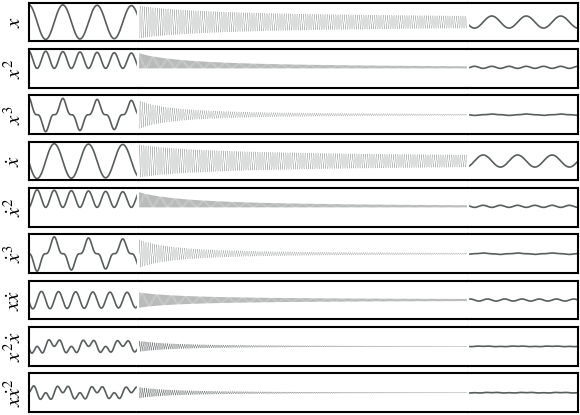

In [7]:
feature_length = len(library)
origin_library = np.zeros([feature_length, N])
for i in range(len(library)):
    origin_library[i,:] = library[i](WND_response.T)

fig,axes = plt.subplots(9,1,figsize = (6/2.54,4.5/2.54),dpi = 300)
plt.subplots_adjust(wspace = 0)
for i in range(9):
    name = library_name[i](feature_name)
    ax = axes[i]
    ax.set_ylabel(r'$x$')
    # ax.spines["left"].set_color("white")
    # ax.spines["right"].set_color("white")
    # ax.spines["top"].set_color("white")
    # ax.spines["bottom"].set_color("white")
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_axis_off()
    axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                       bbox_to_anchor=(0, 0, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(t,origin_library[i,:],lw = 0.4,color = colors[4],label = "$x'' = -x$")
    axins.set_xlim(0,20)
    axins.set_ylabel(r"$%s$"%name, fontsize = 5)
    axins.set_xticks([])
    axins.set_yticks([])
    axins.set_ylim(-1.1,1.1)
    axins.spines["right"].set_color("white")
    # axins.spines["top"].set_color("white")
    # axins.spines["bottom"].set_color("white")
    # axins.spines["left"].set_color("white")
    # axins.spines["right"].set_linewidth(bwith)
    # axins.spines["top"].set_color("white")
    # axins.spines["bottom"].set_color("white")
    # axins.spines["left"].set_color("white")
    
    axins = inset_axes(ax, width="20%", height="100%", loc='center left',
                       bbox_to_anchor=(0.8, 0, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(t,origin_library[i,:],lw = 0.4,color = colors[4],label = "$x'' = -x$")
    axins.set_xlim(980,1000)
    axins.set_ylim(-1.1,1.1)
    axins.set_xticks([])
    axins.set_yticks([])
    # axins.spines["right"].set_color("white")
    # axins.spines["top"].set_color("white")
    # axins.spines["bottom"].set_color("white")
    axins.spines["left"].set_color("white")
    axins = inset_axes(ax, width="60%", height="100%", loc='center left',
                       bbox_to_anchor=(0.2, 0, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(t,origin_library[i,:],lw = 0.05,color = colors[4],label = "$x'' = -x$")
    axins.set_xlim(20,980)
    axins.set_ylim(-1.1,1.1)
    axins.set_yticks([])
    # axins.set_xticks([500,1000,1500])
    axins.set_xticks([])
    axins.spines["right"].set_color("white")
    axins.spines["left"].set_color("white")
    # axins.spines["top"].set_color("white")
    # axins.spines["bottom"].set_color("white")
plt.savefig("./Fig/origin_library.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

In [8]:
model.Library_rebuild()

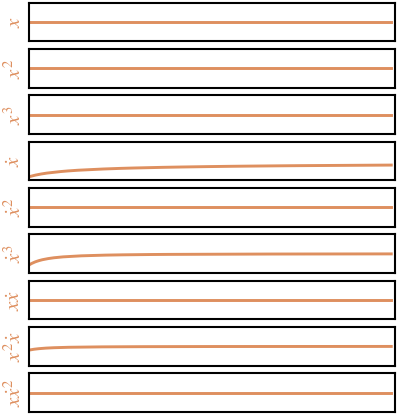

In [10]:
fig,axes = plt.subplots(9,1,figsize = (4/2.54,4.5/2.54),dpi = 300)
plt.subplots_adjust(wspace = 0)
for i in range(9):
    ax = axes[i]
    name = library_name[i](feature_name)
    ax.set_ylabel(r"$%s$"%name, fontsize = 5,color = colors[3])
    # name = "\Phi_A(%s)  \Phi_\beta(%s)"%(library_name[i](feature_name),library_name[i](feature_name))
    ax.plot(model.t_evolutions[:-1],model.Phi[:,0,i,0], color = colors[3], ls = '-', lw = 0.7)
    # ax.plot(model.Phi[:,1,i,0],model.t_evolutions, color = colors[2], ls = '--', lw = 0.7)
    ax.set_ylim(-.6,.6)
    ax.set_xlim(0,T)
    ax.set_xticks([])
    ax.set_yticks([])

    # ax = axes[1][i]
    # # name = "\Phi_A(%s)  \Phi_\beta(%s)"%(library_name[i](feature_name),library_name[i](feature_name))
    # # ax.plot(model.Phi[:,0,i,0],model.t_evolutions, color = colors[1], ls = '-', lw = 0.7)
    # ax.plot(model.Phi[:,1,i,0],model.t_evolutions, color = colors[2], ls = '--', lw = 0.7)
    # ax.set_xlim(-.6,.6)
    # ax.set_ylim(0,T)
    # ax.set_xticks([])
    # ax.set_yticks([])
plt.savefig("./Fig/evolutionary_library_A.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

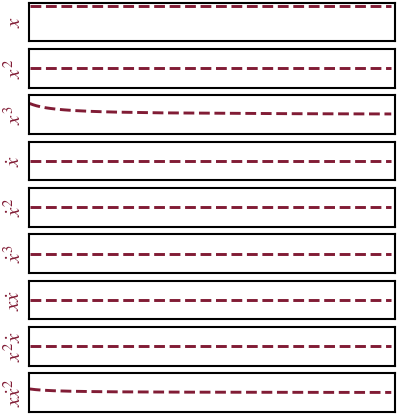

In [11]:
fig,axes = plt.subplots(9,1,figsize = (4/2.54,4.5/2.54),dpi = 300)
plt.subplots_adjust(wspace = 0)
for i in range(9):
    ax = axes[i]
    name = library_name[i](feature_name)
    ax.set_ylabel(r"$%s$"%name, fontsize = 5,color = colors[2])
    # name = "\Phi_A(%s)  \Phi_\beta(%s)"%(library_name[i](feature_name),library_name[i](feature_name))
    # ax.plot(model.t_evolutions,model.Phi[:,0,i,0], color = colors[1], ls = '-', lw = 0.7)
    ax.plot(model.t_evolutions[:-1],model.Phi[:,1,i,0], color = colors[2], ls = '--', lw = 0.7)
    ax.set_ylim(-.6,.6)
    ax.set_xlim(0,T)
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig("./Fig/evolutionary_library_beta.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

In [14]:
from Model import Xi
selected = [0,5]
dt = model.t_evolutions[1] - model.t_evolutions[0]
dot_evolution = np.zeros([2, 1,len(model.t_evolutions)])
dot_evolution[0,0,:] = np.gradient(model.evolutions[0,0,:],dt,edge_order=2)
dot_evolution[1,0,:] = np.gradient(model.evolutions[1,0,:],dt,edge_order=2)
y = dot_evolution[:,0,:-1].T
X = model.Phi[:,:,:,0]
coef = Xi(y, X,selected)
print(coef)


[0.00094334 0.         0.         0.         0.         0.00991638
 0.         0.         0.        ]


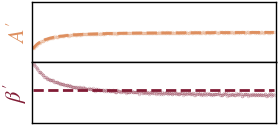

In [18]:
fig,ax = plt.subplots(2,1,figsize = (4/2.54,2/2.54),dpi = 200)
plt.subplots_adjust(hspace = 0)
idx = range(len(y[:,0]))
ax[0].scatter(model.t_evolutions[:-1], y[:,0],s=0.05,alpha = 0.3,color = colors[3])
ax[1].scatter(model.t_evolutions[:-1], y[:,1], s=0.05,alpha = 0.3,color = colors[2])
ax[0].plot(model.t_evolutions[:-1], np.dot(X[:,0,:], coef),lw = 1,color = colors[3], ls = '--')
ax[1].plot(model.t_evolutions[:-1], np.dot(X[:,1,:], coef),lw = 1,color = colors[2], ls = '--')
ax[0].set_xlim(0,T)
ax[1].set_xlim(0,T)
ax[0].set_ylim(-0.006,0.006)
ax[1].set_ylim(-0.006,0.006)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_ylabel(r"$A'$",color = colors[3])
ax[1].set_ylabel(r"$\beta'$",color = colors[2])
plt.savefig("./Fig/residual.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

In [19]:
def corr(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    cov = np.sum((a)*(b))
    # print(cov)
    a_norm = np.linalg.norm(a, ord = 2)
    b_norm = np.linalg.norm(b, ord = 2)
    return np.abs(cov/(a_norm*b_norm))

S = []
Cdots_A = []

y_hat = np.copy(y)
for n in range(2):
    Cdots_A.append([])

    Cdots = []

    for i in range(9):
        Cdots_A[-1].append([])
        if i in S:
            Cdots.append(0)
            Cdots_A[-1][-1].append(0)
            Cdots_A[-1][-1].append(0)
        else:
            new_dot = 0
            for j in range(2):
                
                library_norm = np.max(np.abs(X[:,j,i]))
                if library_norm < 1e-10:
                    new_dot += 0
                    Cdots_A[-1][-1].append(0)
                else:
                    new_dot += corr(y_hat[:,j],X[:,j,i])
                    Cdots_A[-1][-1].append(corr(y_hat[:,j],X[:,j,i]))
            Cdots.append(new_dot)
    Idx = np.argmax(Cdots)
    S.append(Idx)
    print(S)

    coef = Xi(y,X,S)
    y_hat[:,0] = y[:,0] - np.dot(X[:,0,:], coef)
    y_hat[:,1] = y[:,1] - np.dot(X[:,1,:], coef)

[7]
[7, 8]


In [20]:
S

[7, 8]

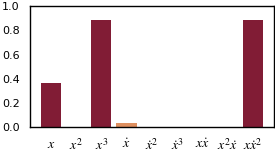

In [21]:
Z = np.array(Cdots_A)

xticks = []
for i in range(9):
    xticks.append(r"$%s$"%library_name[i](feature_name))
fig,ax = plt.subplots(1,1,figsize = (4/2.54,2/2.54),dpi = 200)
plt.tick_params(axis='both', which='major', pad=.1)
plt.tick_params(top=False,bottom=False,left=False,right=False)
ax.bar(range(9),height=Z[1,:,0],color = colors[3])
ax.bar(range(9),height=Z[1,:,1],color = colors[2])
ax.set_ylim(0,1)
ax.set_xticks(range(9))
# ax.set_ylabel("Correlation",fontsize = 6)
ax.set_xticklabels(xticks,fontsize = 5)
plt.savefig("./Fig/Correlation.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

[-1.77896827e-03  0.00000000e+00  1.98557064e-02  1.95367602e-05
  0.00000000e+00  9.86515423e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


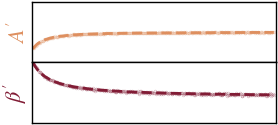

In [24]:
from Model import Xi
selected = [0,2,3,5]
dt = model.t_evolutions[1] - model.t_evolutions[0]
dot_evolution = np.zeros([2, 1,len(model.t_evolutions)])
dot_evolution[0,0,:] = np.gradient(model.evolutions[0,0,:],dt,edge_order=2)
dot_evolution[1,0,:] = np.gradient(model.evolutions[1,0,:],dt,edge_order=2)
y = dot_evolution[:,0,:-1].T
X = model.Phi[:,:,:,0]
coef = Xi(y, X,selected)
print(coef)
fig,ax = plt.subplots(2,1,figsize = (4/2.54,2/2.54),dpi = 200)
plt.subplots_adjust(hspace = 0)
idx = range(len(y[:,0]))
ax[0].scatter(model.t_evolutions[:-1], y[:,0],s=0.05,alpha = 0.3,color = colors[3])
ax[1].scatter(model.t_evolutions[:-1], y[:,1], s=0.05,alpha = 0.3,color = colors[2])
ax[0].plot(model.t_evolutions[:-1], np.dot(X[:,0,:], coef),lw = 1,color = colors[3], ls = '--')
ax[1].plot(model.t_evolutions[:-1], np.dot(X[:,1,:], coef),lw = 1,color = colors[2], ls = '--')
ax[0].set_xlim(0,T)
ax[1].set_xlim(0,T)
ax[0].set_ylim(-0.006,0.006)
ax[1].set_ylim(-0.006,0.006)
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_ylabel(r"$A'$",color = colors[3])
ax[1].set_ylabel(r"$\beta'$",color = colors[2])
plt.savefig("./Fig/overfitting.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)

In [48]:
feature_length = 9
contributions = np.zeros((feature_length,2))
for i in range(feature_length):
        A_i = coef[i] * X[:,0,i]
        beta_i = coef[i] * X[:,1,i]
        contribution_i = (np.sum(A_i**2/(y[:,0])**2)/N, np.sum(beta_i**2/(y[:,1])**2)/N)
        # contribution_i = np.sum(np.abs(A_i) + np.abs(beta_i))/N
        contributions[i,0] = contribution_i[0]
        contributions[i,1] = contribution_i[1]
# print(contributions)
contributions[:,0] = contributions[:,0]/np.max(contributions[:,0])
contributions[:,1] = contributions[:,1]/np.max(contributions[:,1])
print(contributions)

[[1.43747396e-32 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [7.87043171e-33 9.91383813e-01]
 [3.04335627e-04 3.24003979e-40]
 [0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.71430142e-37]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]]


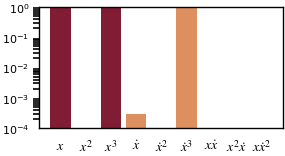

In [49]:
fig,ax = plt.subplots(1,1,figsize = (4/2.54,2/2.54),dpi = 200)
plt.tick_params(axis='both', which='major', pad=.1)
plt.tick_params(top=False,bottom=False,left=False,right=False)
ax.bar(range(9),height=contributions[:,0],color = colors[3])
ax.bar(range(9),height=contributions[:,1],color = colors[2])
ax.set_ylim(1e-4,1)
ax.set_yscale('log')
ax.set_xticks(range(9))
# ax.set_ylabel("Correlation",fontsize = 6)
ax.set_xticklabels(xticks,fontsize = 5)
plt.savefig("./Fig/contributions.svg",dpi = 400,transparent = True,bbox_inches="tight",pad_inches = 0.01)


In [19]:
417.81/((1.062774+0.2476914)*4)

79.70641575122853